<a href="https://colab.research.google.com/github/AyHaski/DL_AtariRainbow/blob/master/Dopa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dopamine Framework for Rainbow Agent

This colab was created through combining [this colab](https://colab.research.google.com/github/google/dopamine/blob/master/dopamine/colab/cartpole.ipynb) and [this colab](https://colab.research.google.com/github/google/dopamine/blob/master/dopamine/colab/agent_visualizer.ipynb) provided from the dopamine framework itself.

The notebook is mainly only a addition if the dopamine framework wants to be tried out.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# @title Install necessary packages.
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install gin-config
!pip install cmake
!pip install atari_py
!pip install matplotlib
!pip install numpy
!pip install pillow
!pip install pygame
!pip install scipy
!pip install tensorflow
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

     |████████████████████████████████| 92kB 51.2MB/s 
  Found existing installation: dopamine-rl 1.0.5
    Uninstalling dopamine-rl-1.0.5:
      Successfully uninstalled dopamine-rl-1.0.5


In [0]:
# @title Necessary imports and globals.
%tensorflow_version 1.x
import numpy as np
import os
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

BASE_PATH = '/content/drive/My Drive/colab_dopamine_run'  # @param

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





In [0]:
RAINBOW_PATH = os.path.join(BASE_PATH, 'rainbow')
rainbow_config = """
# Hyperparameters follow Hessel et al. (2018), except for sticky_actions,
# which was False (not using sticky actions) in the original paper.
import dopamine.agents.rainbow.rainbow_agent
import dopamine.discrete_domains.atari_lib
import dopamine.discrete_domains.run_experiment
import dopamine.replay_memory.prioritized_replay_buffer
import gin.tf.external_configurables

RainbowAgent.num_atoms = 51
RainbowAgent.vmax = 10.
RainbowAgent.gamma = 0.99
RainbowAgent.update_horizon = 3
RainbowAgent.min_replay_history = 20000  # agent steps
RainbowAgent.update_period = 4
RainbowAgent.target_update_period = 8000  # agent steps
RainbowAgent.epsilon_train = 0.01
RainbowAgent.epsilon_eval = 0.001
RainbowAgent.epsilon_decay_period = 250000  # agent steps
RainbowAgent.replay_scheme = 'prioritized'
RainbowAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
RainbowAgent.optimizer = @tf.train.AdamOptimizer()

# Note these parameters are different from C51's.
tf.train.AdamOptimizer.learning_rate = 0.0000625
tf.train.AdamOptimizer.epsilon = 0.00015

atari_lib.create_atari_environment.game_name = 'SpaceInvaders'
# Sticky actions with probability 0.25, as suggested by (Machado et al., 2017).
atari_lib.create_atari_environment.sticky_actions = True
create_agent.agent_name = 'rainbow'
Runner.num_iterations = 200
Runner.training_steps = 250000  # agent steps
Runner.evaluation_steps = 125000  # agent steps
Runner.max_steps_per_episode = 27000  # agent steps

WrappedPrioritizedReplayBuffer.replay_capacity = 1000000
WrappedPrioritizedReplayBuffer.batch_size = 32
"""
gin.parse_config(rainbow_config, skip_unknown=False)

In [0]:
rainbow_runner = run_experiment.create_runner(RAINBOW_PATH, schedule='continuous_train_and_eval')
print('Will train agent, please be patient, may be a while...')
rainbow_runner.run_experiment()
print('Done training!')







INFO:tensorflow:Creating RainbowAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 3.000000
INFO:tensorflow:	 min_replay_history: 20000
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 8000
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7fab3b4839e8>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4

INFO:tensorflow:Creating a OutOfGraphPrioritizedReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (84, 84)
INFO:tensorflow:	 observation_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 4
INFO:tensorflow:	 replay_capacity: 1000000
INFO:tensorflow:	 batch_size: 32
INFO:tensorflow:	 update_horizon: 3
INFO:tenso

# Plot the results

In [0]:
# @title Load the training logs.
data = colab_utils.read_experiment(RAINBOW_PATH, verbose=True,
                                   summary_keys=['train_episode_returns'])
data['agent'] = 'Rainbow'
data['run'] = 1


Reading statistics from: /content/drive/My Drive/colab_dopamine_run/rainbow//logs/log_31



/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


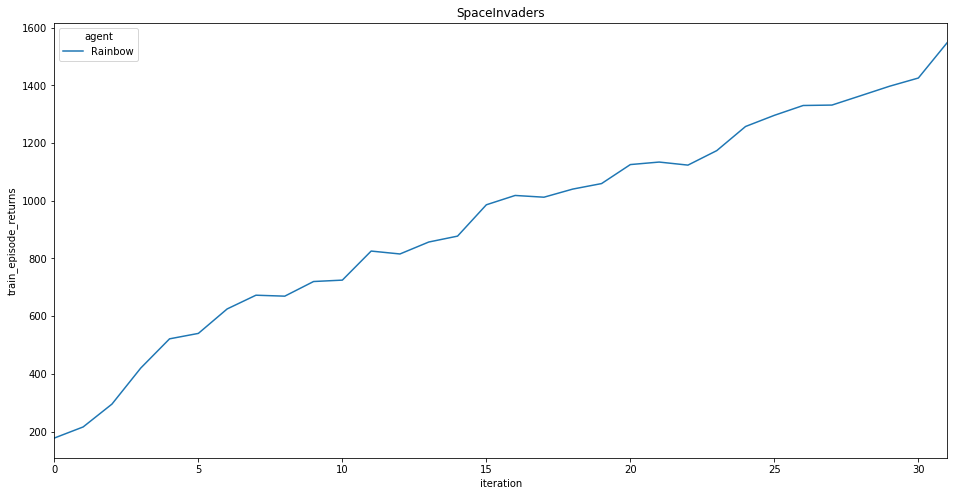

In [0]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=data, time='iteration', unit='run',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title('SpaceInvaders')
plt.show()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
INFO:tensorflow:Creating MyRainbowAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 20000
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 8000
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /cpu:*
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7f343d5a3f60>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4
INFO:tensorflow:Creating a OutOfGraphPrioritizedReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (84, 84)
INFO:tensorflow:	 observation_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 terminal_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 

/usr/local/lib/python3.6/dist-packages/dopamine/utils/line_plotter.py:99: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  self.plot.set_xlim(min_xlim, max_xlim)
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


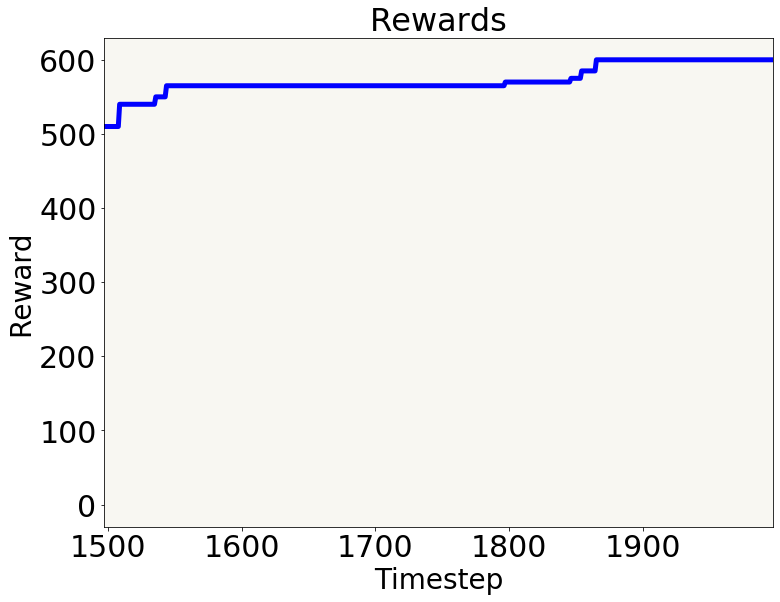

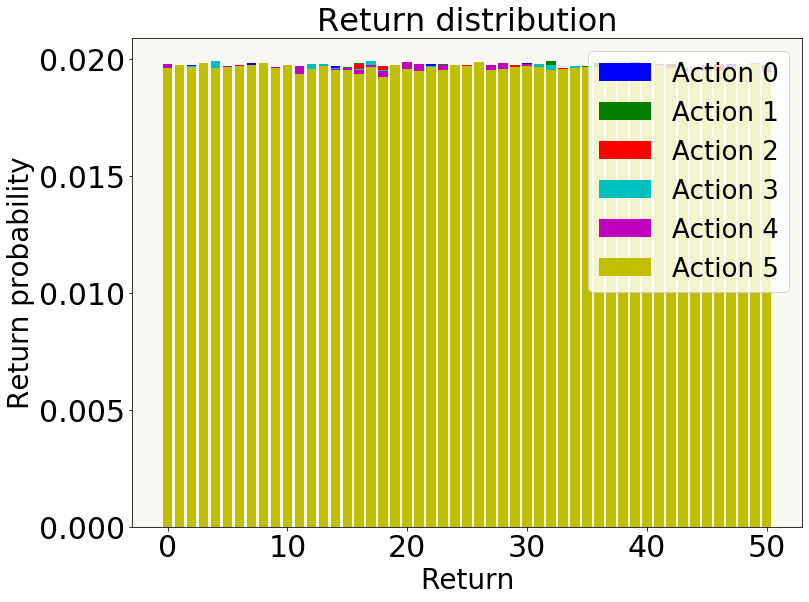

In [0]:
from dopamine.utils import example_viz_lib
num_steps = 2000  # @param {type:"number"}
example_viz_lib.run(agent='rainbow', game='SpaceInvaders', num_steps=num_steps,
                    root_dir='/tmp/agent_viz', restore_ckpt='/content/drive/My Drive/colab_dopamine_run/rainbow/checkpoints/tf_ckpt-30', use_legacy_checkpoint=False)

In [0]:
# @title Display the video
import base64
from IPython.display import HTML
base_dir = '/tmp/agent_viz/agent_viz/SpaceInvaders/rainbow'
video = open('{}/images/video.mp4'.format(base_dir), 'rb').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [0]:
LOG_DIR = '/content/drive/My Drive/colab_dopamine_run/rainbow'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
!tensorboard --logdir='/content/drive/My Drive/colab_dopamine_run/rainbow' 

W0113 18:43:55.432415 140092764587776 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0113 18:43:55.442619 140092764587776 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
TensorBoard 1.15.0 at http://e8e81481afdb:6006/ (Press CTRL+C to quit)
